In [4]:
# importing of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [6]:
#loading of datasets
data = pd.read_csv("C:/Users/Nothing/OneDrive/Desktop/Mall_Customers.csv")

In [7]:
# Display basic information about the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

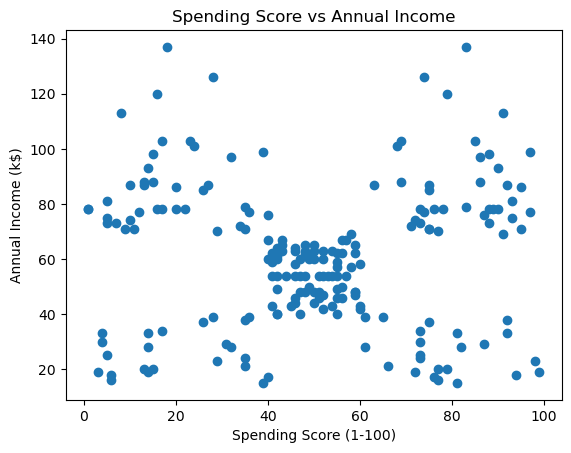

In [8]:
# Visualize the data using a scatter plot
plt.scatter(data["Spending Score (1-100)"], data["Annual Income (k$)"])
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
plt.title("Spending Score vs Annual Income")
plt.show()

In [9]:
# Step 1: Finding the sum of squared within-cluster distances for different number of clusters
ssw = []
clusters = range(1, 10)
for i in clusters:
    model = KMeans(n_clusters=i, init='k-means++', n_init=100)
    model.fit(data[["Spending Score (1-100)", "Annual Income (k$)"]])
    ssw.append(model.inertia_)

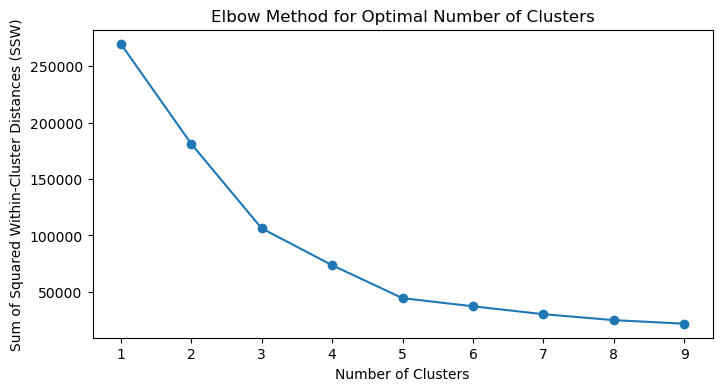

In [10]:
# Step 2: Plotting the Elbow plot to determine the optimal number of clusters
plt.figure(figsize=(8, 4))
plt.plot(clusters, ssw, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Within-Cluster Distances (SSW)")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()

In [11]:
# Step 3: Creating a K-means clustering model with the optimal number of clusters (assumed to be 5 here)
optimal_clusters = 5
model = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=100)
y_predicted = model.fit_predict(data[["Spending Score (1-100)", "Annual Income (k$)"]])

In [12]:
# Step 4: Assigning each data point to a cluster and adding the cluster information to the dataset
data["Group"] = y_predicted
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  Group
0           1    Male   19                  15                      39      1
1           2    Male   21                  15                      81      3
2           3  Female   20                  16                       6      1
3           4  Female   23                  16                      77      3
4           5  Female   31                  17                      40      1


In [13]:
# Step 4: Assigning each data point to a cluster and adding the cluster information to the dataset
data["Group"] = y_predicted
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  Group
0           1    Male   19                  15                      39      1
1           2    Male   21                  15                      81      3
2           3  Female   20                  16                       6      1
3           4  Female   23                  16                      77      3
4           5  Female   31                  17                      40      1


In [14]:
# Step 5: Separating data points belonging to each cluster
df1 = data[data.Group == 0]
df2 = data[data.Group == 1]
df3 = data[data.Group == 2]
df4 = data[data.Group == 3]
df5 = data[data.Group == 4]

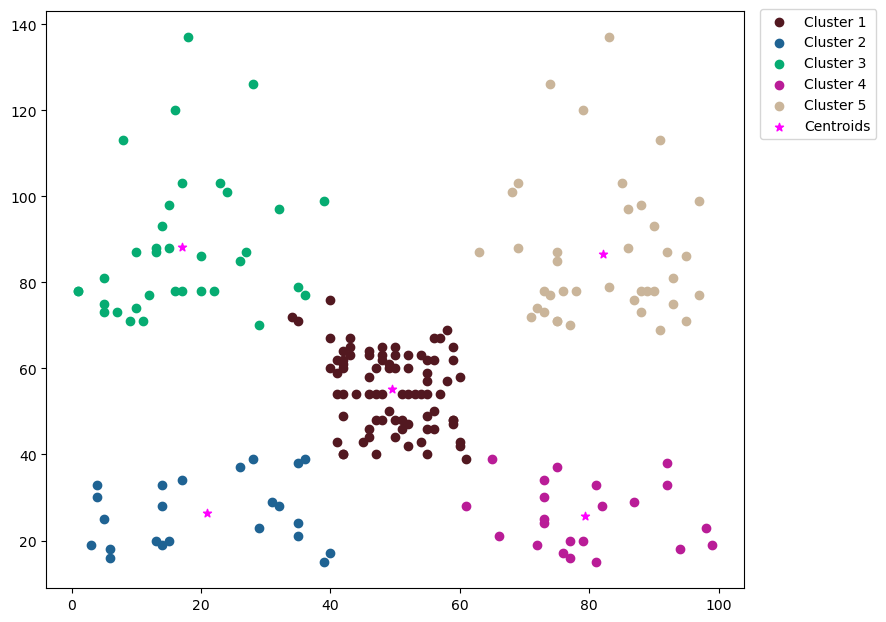

In [15]:
# Step 6: Visualizing the clusters along with their centroids
plt.figure(figsize=(9, 7.5))
plt.scatter(df1["Spending Score (1-100)"], df1["Annual Income (k$)"], color="#521820", label="Cluster 1")
plt.scatter(df2["Spending Score (1-100)"], df2["Annual Income (k$)"], color="#1f6393", label="Cluster 2")
plt.scatter(df3["Spending Score (1-100)"], df3["Annual Income (k$)"], color="#06ac72", label="Cluster 3")
plt.scatter(df4["Spending Score (1-100)"], df4["Annual Income (k$)"], color="#b91c97", label="Cluster 4")
plt.scatter(df5["Spending Score (1-100)"], df5["Annual Income (k$)"], color="#cab59a", label="Cluster 5")
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color="magenta", marker="*", label="Centroids")
plt.legend(loc='upper right', bbox_to_anchor=(1.20, 1.015))

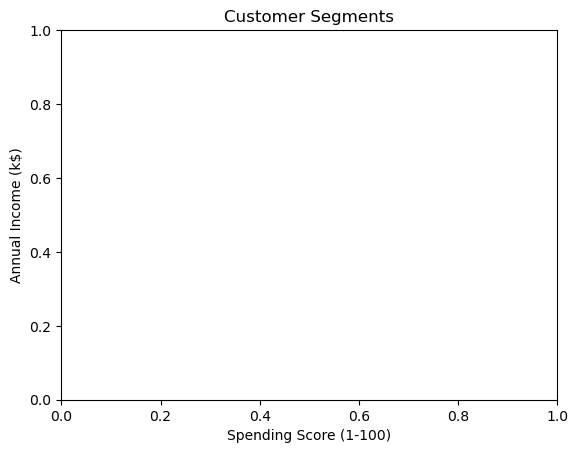

In [16]:
plt.title("Customer Segments")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
plt.show()

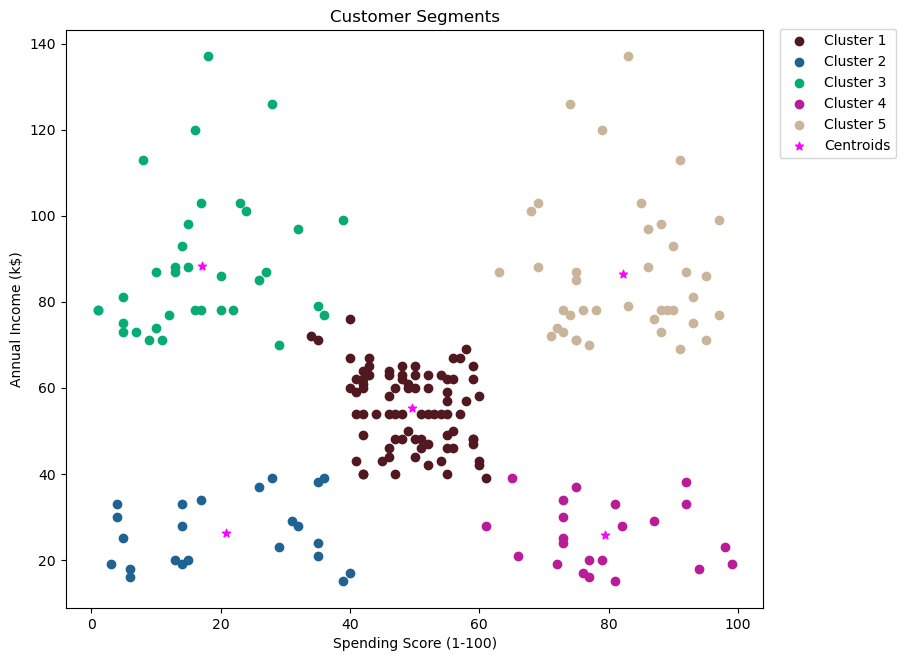

In [17]:
plt.figure(figsize=(9, 7.5))
plt.scatter(df1["Spending Score (1-100)"], df1["Annual Income (k$)"], color="#521820", label="Cluster 1")
plt.scatter(df2["Spending Score (1-100)"], df2["Annual Income (k$)"], color="#1f6393", label="Cluster 2")
plt.scatter(df3["Spending Score (1-100)"], df3["Annual Income (k$)"], color="#06ac72", label="Cluster 3")
plt.scatter(df4["Spending Score (1-100)"], df4["Annual Income (k$)"], color="#b91c97", label="Cluster 4")
plt.scatter(df5["Spending Score (1-100)"], df5["Annual Income (k$)"], color="#cab59a", label="Cluster 5")
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color="magenta", marker="*", label="Centroids")
plt.legend(loc='upper right', bbox_to_anchor=(1.20, 1.015))
plt.title("Customer Segments")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
plt.show()

In [18]:
print("completed")

completed
